In [86]:
# importing dependencies 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline

In [87]:
# undetstanding the dataset
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [88]:
# accessing data attributes
dataset = boston.data
for name, index in enumerate(boston.feature_names):
    print(index, name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [89]:
# reshaping the data
data = dataset[:,5].reshape(-1, 1) # i -> attribute we are considering starting from 0. Here it's 5

# shape of the dataset
np.shape(dataset)

(506, 13)

In [90]:
# target values
target = boston.target.reshape(-1, 1)

# shape of target
np.shape(target)

(506, 1)

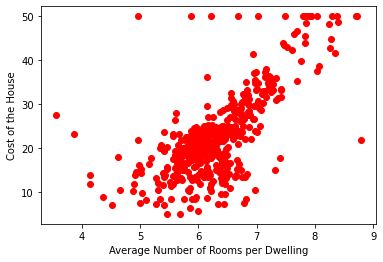

In [91]:
# ensuring that matplotlib is working
plt.scatter(data, target, color='red')
plt.xlabel("Average Number of Rooms per Dwelling") # name that should be given to x-axis
plt.ylabel("Cost of the House") # name that should be given to y-axis
plt.show()

In [92]:
# regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge # Can Use Lasso and Rigde Models also. Just replace the 
                                                                # LinearRegression with Lasso or Ridge

# creating a regression model
reg = LinearRegression()

# fitting the data
reg.fit(data, target)

LinearRegression()

In [93]:
# prediction
pred = reg.predict(data)

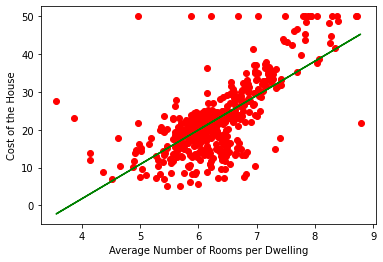

In [94]:
# finding the regression line
plt.scatter(data, target, color = 'red')
plt.plot(data, pred, color = 'green')
plt.xlabel("Average Number of Rooms per Dwelling")
plt.ylabel("Cost of the House")
plt.show()

In [95]:
# If we want more accurate reggression model we can use the polynomial regression model
# circumventing the curve line issue using polynomial model
from sklearn.preprocessing import PolynomialFeatures

# to allow merging of both models
from sklearn.pipeline import make_pipeline

In [96]:
model = make_pipeline(PolynomialFeatures(20), reg)

In [97]:
# fitting data
model.fit(data, target)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=20)),
                ('linearregression', LinearRegression())])

In [98]:
pred = model.predict(data)

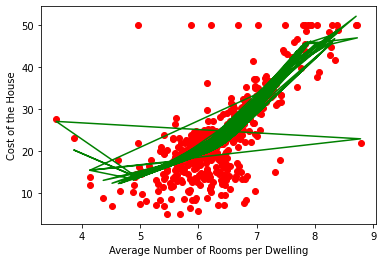

In [99]:
# finding the regression line
plt.scatter(data, target, color = 'red')
plt.plot(data, pred, color = 'green')
plt.xlabel("Average Number of Rooms per Dwelling")
plt.ylabel("Cost of the House")
plt.show()

In [100]:
# r^2 metric to judge the performance of our model
from sklearn.metrics import r2_score

In [101]:
# predicting the performance
r2_score(pred, target) # score is approximately 0.338

0.3379530519507644